In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-learning-basics-for-beginners/scatterplot.JPG
/kaggle/input/machine-learning-basics-for-beginners/different_lines.JPG
/kaggle/input/machine-learning-basics-for-beginners/homeprices.csv
/kaggle/input/machine-learning-basics-for-beginners/homepricetable.JPG
/kaggle/input/machine-learning-basics-for-beginners/equation.PNG
/kaggle/input/machine-learning-basics-for-beginners/prediction.csv
/kaggle/input/machine-learning-basics-for-beginners/error_equation.jpg
/kaggle/input/machine-learning-basics-for-beginners/areas.csv
/kaggle/input/machine-learning-basics-for-beginners/linear_equation.png


<h1 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h1>

In [2]:
df = pd.read_csv('/kaggle/input/machine-learning-basics-for-beginners/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000
5,4400,770000
6,4800,815000
7,5200,860000


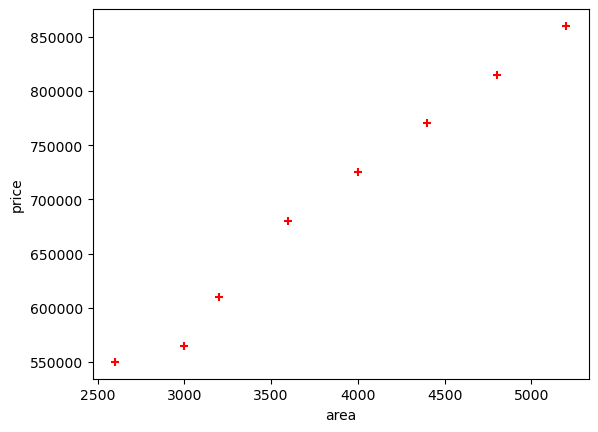

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [4]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,4400
6,4800
7,5200


In [5]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
5    770000
6    815000
7    860000
Name: price, dtype: int64

# linear regression object

In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [7]:
reg.predict([[2800]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([564587.62886598])

In [8]:
reg.coef_

array([125.98797251])

In [9]:
reg.intercept_

211821.3058419245

**Y = m * X + b (m is coefficient and b is intercept)**

In [10]:
2800*135.78767123 + 180616.43835616432

560821.9178001643

**(1) Predict price of a home with area = 5000 sqr ft**

In [11]:
reg.predict([[5000]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([841761.16838488])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [12]:
area_df = pd.read_csv("/kaggle/input/machine-learning-basics-for-beginners/areas.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [13]:
p = reg.predict(area_df)
p

array([ 337809.27835052,  400803.26460481,  501593.64261168,
        657818.72852234,  730891.75257732,  786326.4604811 ,
        903495.27491409,  647739.69072165,  810264.17525773,
        501593.64261168, 1345713.05841924, 1295317.86941581,
       1106335.91065292])

In [14]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.378093e+05
1,1500,4.008033e+05
2,2300,5.015936e+05
3,3540,6.578187e+05
4,4120,7.308918e+05
5,4560,7.863265e+05
6,5490,9.034953e+05
7,3460,6.477397e+05
8,4750,8.102642e+05
9,2300,5.015936e+05


In [15]:
area_df.to_csv("prediction.csv")